<a href="https://colab.research.google.com/github/mtofighi/ChilwaBasin/blob/main/ChilwaBasin_DataAnalysis_032024/ChilwaBasin_Regression_PyCaret_Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last updated: 25 Mar 2024
# >> AgricultureClimateDataset

# 👋 PyCaret Regression Tutorial


In [1]:
!pip install pycaret -q #[full] -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.0 MB/s

In [2]:
!pip install pycaret[analysis] -q
!pip install pycaret[models] -q
!pip install pycaret[tuner] -q
!pip install pycaret[mlops] -q
!pip install pycaret[parallel] -q
!pip install pycaret[test] -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 9.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.3/137.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [4]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.0'

# 🚀 Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

In [32]:
### load sample dataset from pycaret dataset module
# from pycaret.datasets import get_data
# data = get_data('insurance')

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://github.com/mtofighi/ChilwaBasin/blob/main/ChilwaBasin_DataAnalysis_032024/Dataset/ChilwaBasin_AgricultureClimateDataset_04052024.xlsx?raw=true'

dataAll = pd.read_excel(url)

# Convert the index to datetime format (assuming the index is in a date format)
dataAll.index = pd.to_datetime(dataAll.iloc[:, 0])

# # Extract year and month from the index
# dataAll['Year'] = dataAll.index.year

# # Set the columns 'Year' and 'Month' as the index
# dataAll.set_index(['Year'], inplace=True)

# Check the type of dataset
print("Data types:", dataAll.dtypes)

# Check the shape of the data
print("Data shape:", dataAll.shape)

# Convert the column names to an array
headers = dataAll.columns.to_numpy()

# Print the headers array
print("Headers:", headers)

Data types: Year                                int64
ChimpeniNovDecRainfall            float64
ChimpeniJan2AprRainfall           float64
ChimpeniNov2AprRainfall           float64
SPI1                              float64
SPI3                              float64
SatelliteAverageMinTemperature    float64
SatelliteAverageMaxTemperature    float64
SatelliteAverageTemperature       float64
SatelliteNovDecRainfall           float64
SatelliteJan2AprRainfall          float64
SatelliteNov2AprRainfall          float64
MaizeArea_HA_D1                     int64
MaizeProduction_MT_D1               int64
RiceArea_HA_D1                      int64
RiceProduction_MT_D1                int64
TobaccoArea_HA_D1                   int64
TobaccoProduction_MT_D1           float64
UREA_T_D1                         float64
MaizeArea_HA_D2                     int64
MaizeProduction_MT_D2               int64
RiceArea_HA_D2                      int64
RiceProduction_MT_D2                int64
TobaccoArea_HA_D2     

## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [39]:
# Temperature

# import pycaret regression and init setup
from pycaret.regression import *
##---------------------------------------------
# The dataset is called 'dataAll'

# All column Heasers
column_names = ['ChimpeniNovDecRainfall', 'ChimpeniJan2AprRainfall',
 'ChimpeniNov2AprRainfall', 'SPI1', 'SPI3', 'SatelliteAverageMinTemperature',
 'SatelliteAverageMaxTemperature', 'SatelliteAverageTemperature',
 'SatelliteNovDecRainfall', 'SatelliteJan2AprRainfall',
 'SatelliteNov2AprRainfall', 'MaizeArea_HA_D1', 'MaizeProduction_MT_D1',
 'RiceArea_HA_D1', 'RiceProduction_MT_D1', 'TobaccoArea_HA_D1',
 'TobaccoProduction_MT_D1','UREA_T_D1', 'MaizeArea_HA_D2',
 'MaizeProduction_MT_D2', 'RiceArea_HA_D2', 'RiceProduction_MT_D2',
 'TobaccoArea_HA_D2', 'TobaccoProduction_MT_D2', 'UREA_T_D2',
 'MaizeArea_HA_D4', 'MaizeProduction_MT_D4', 'RiceArea_HA_D4',
 'RiceProduction_MT_D4', 'TobaccoArea_HA_D4', 'TobaccoProduction_MT_D4',
 'UREA_T_D4', 'MaizeAreaTotal_HA', 'MaizeProductionTotal_MT',
 'RiceAreaTotal_HA', 'RiceProductionTotal_MT', 'TobaccoAreaTotal_HA',
 'TobaccoProductionTotal_MT', 'UREATotal_T']  # Specify the desired column names

# Filter the data based on the date range
filtered_data = dataAll.loc[(dataAll['Year'] >= 2010) & (dataAll['Year'] <= 2021)]

# Select the desired columns
filtered_data = filtered_data[column_names]

# Drop rows with missing values
filtered_data.dropna(inplace=True)

# Extract the features and target variable   'SatelliteAverageMinTemperature','SatelliteAverageMaxTemperature', 'SatelliteAverageTemperature',
data = filtered_data[
    [
        'ChimpeniNovDecRainfall', 'ChimpeniJan2AprRainfall','ChimpeniNov2AprRainfall',
        'SPI1', 'SPI3',
        'SatelliteNovDecRainfall', 'SatelliteJan2AprRainfall','SatelliteNov2AprRainfall',
        'MaizeAreaTotal_HA', 'MaizeProductionTotal_MT',
        # 'RiceAreaTotal_HA', 'RiceProductionTotal_MT',
        # 'TobaccoAreaTotal_HA','TobaccoProductionTotal_MT',
        'UREATotal_T',
    ]
]
# # Initialize setup
# s = setup(data, target= 'MaizeProductionTotal_MT', session_id = 123)



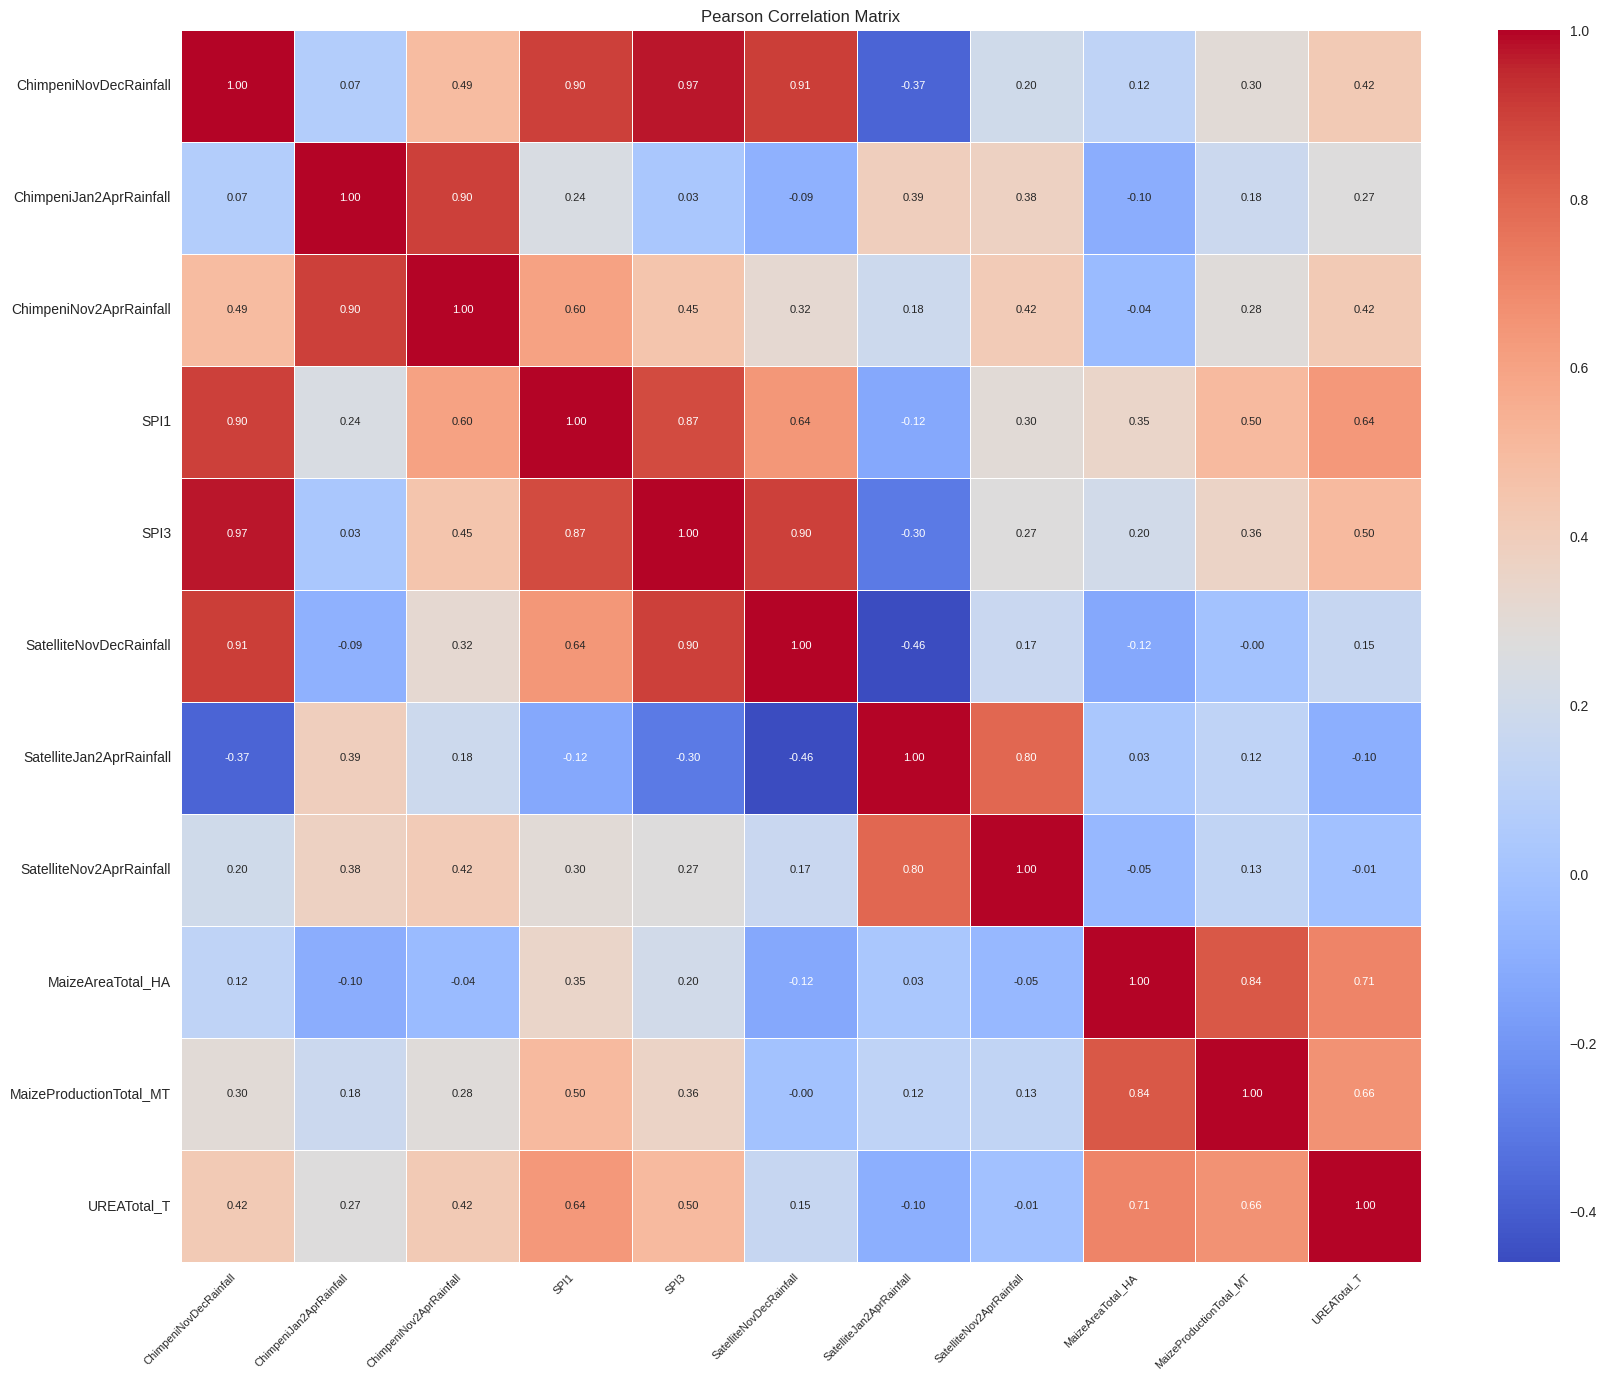

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Calculate Pearson Correlation
correlation_matrix_pearson = data.corr()

# Set the figure size and annotation font size
plt.figure(figsize=(20, 16))

# Plot the Pearson correlation matrix
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, linewidths=0.5)
plt.title('Pearson Correlation Matrix', fontsize=12)

# Rotate the feature names on the x-axis
plt.xticks(rotation=45, ha='right', fontsize=8)

# Save the plot in high-quality JPG format
# plt.savefig('pearson_correlation_matrix_plot.jpg', dpi=300, bbox_inches='tight')

# Save the Pearson correlation matrix as an Excel file
correlation_matrix_pearson.to_excel('pearson_correlation_matrix.xlsx')

# Show the plot
plt.show()

Mean Squared Error: 1951641529.1381667
R^2 Score: -0.5424854490299753
Feature Importance: [0.14141912 0.15174767 0.12349724 0.12844451 0.06979056 0.05230574
 0.06683992 0.01941166 0.16315155 0.08339203]


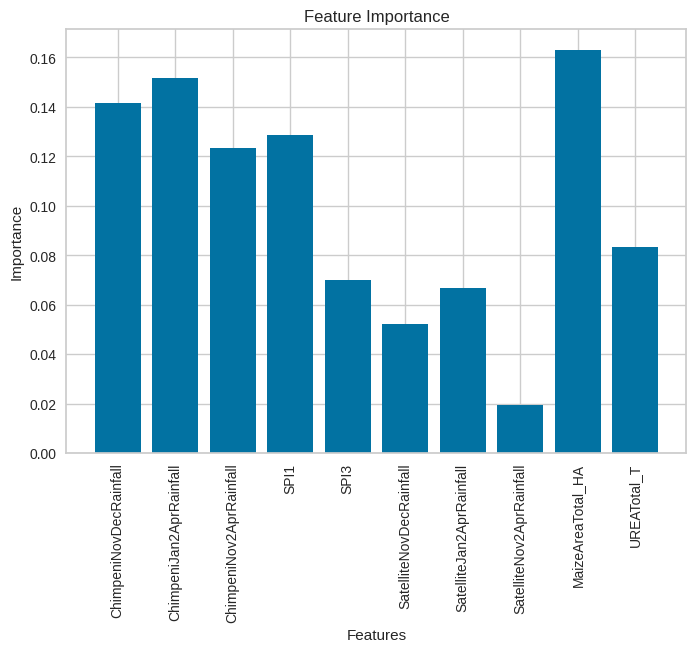

In [54]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Filtered dataset
filtered_data = dataAll.loc[(dataAll['Year'] >= 2010) & (dataAll['Year'] <= 2021)]

# Features and target variable
features =     [
        'ChimpeniNovDecRainfall', 'ChimpeniJan2AprRainfall','ChimpeniNov2AprRainfall',
        'SPI1', 'SPI3',
        'SatelliteNovDecRainfall', 'SatelliteJan2AprRainfall','SatelliteNov2AprRainfall',
        'MaizeAreaTotal_HA',
        # 'RiceAreaTotal_HA', 'RiceProductionTotal_MT',
        # 'TobaccoAreaTotal_HA','TobaccoProductionTotal_MT',
        'UREATotal_T',
    ]
target = 'MaizeProductionTotal_MT'

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_data[features], filtered_data[target], test_size=0.2, random_state=42)

# Creating and training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Feature importance
feature_importance = rf_model.feature_importances_
print("Feature Importance:", feature_importance)

# Visualizing feature importance
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

Mean Squared Error: 1360988944.1102002
R^2 Score: -0.07566149379271248
Feature Importance: [0.36431343 0.3173219  0.31836467]


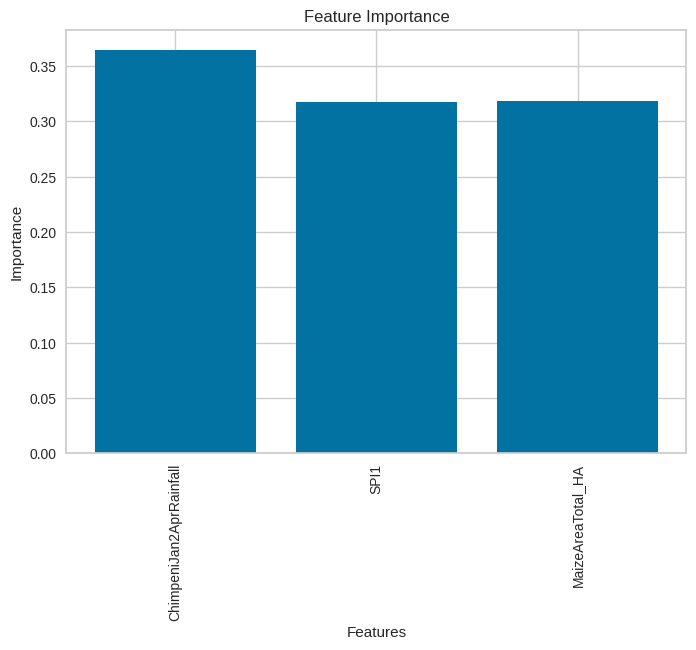

In [55]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Filtered dataset
filtered_data = dataAll.loc[(dataAll['Year'] >= 2010) & (dataAll['Year'] <= 2021)]

# Features and target variable
features =     [
        'ChimpeniJan2AprRainfall',
        'SPI1',
        'MaizeAreaTotal_HA',
    ]
target = 'MaizeProductionTotal_MT'

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_data[features], filtered_data[target], test_size=0.2, random_state=42)

# Creating and training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Feature importance
feature_importance = rf_model.feature_importances_
print("Feature Importance:", feature_importance)

# Visualizing feature importance
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

Mean Squared Error: 21692146737.243404
R^2 Score: -13.449887083431046


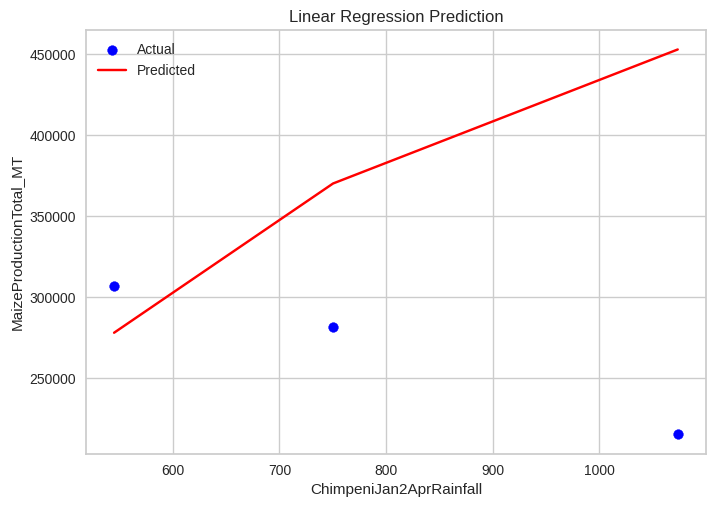

In [58]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Filtered dataset
filtered_data = dataAll.loc[(dataAll['Year'] >= 2010) & (dataAll['Year'] <= 2020)]

# Features and target variable
features =     [
        'ChimpeniNovDecRainfall', 'ChimpeniJan2AprRainfall','ChimpeniNov2AprRainfall',
        'SPI1', 'SPI3',
        'MaizeAreaTotal_HA',
        # 'RiceAreaTotal_HA', 'RiceProductionTotal_MT',
        # 'TobaccoAreaTotal_HA','TobaccoProductionTotal_MT',
        'UREATotal_T',
    ]
target = 'MaizeProductionTotal_MT'

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_data[features], filtered_data[target], test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Visualizing predictions
plt.scatter(X_test['ChimpeniJan2AprRainfall'], y_test, color='blue', label='Actual')
plt.plot(X_test['ChimpeniJan2AprRainfall'], y_pred, color='red', label='Predicted')
plt.xlabel('ChimpeniJan2AprRainfall')
plt.ylabel('MaizeProductionTotal_MT')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

In [49]:
# transpiles learned function to java
print(convert_model(rf_model, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[0] <= 533.6999969482422) {
            if (input[0] <= 375.0500030517578) {
                var0 = 184367.0;
            } else {
                var0 = 262859.0;
            }
        } else {
            if (input[1] <= -0.005000002682209015) {
                var0 = 366700.0;
            } else {
                if (input[2] <= 183563.0) {
                    var0 = 339945.0;
                } else {
                    var0 = 325905.0;
                }
            }
        }
        double var1;
        if (input[2] <= 184360.5) {
            if (input[2] <= 181755.5) {
                if (input[0] <= 516.8999938964844) {
                    var1 = 217914.0;
                } else {
                    var1 = 252526.0;
                }
            } else {
                var1 = 184367.0;
            }
        } else {
            if (input[2] <= 188342.0) {
             

In [25]:
# Extract the features and target variable   'SatelliteAverageMinTemperature','SatelliteAverageMaxTemperature', 'SatelliteAverageTemperature',
data = filtered_data[
    [
        'ChimpeniNovDecRainfall', 'ChimpeniJan2AprRainfall','ChimpeniNov2AprRainfall',
        'SPI1', 'SPI3',
        'SatelliteNovDecRainfall', 'SatelliteJan2AprRainfall','SatelliteNov2AprRainfall',
        'MaizeProductionTotal_MT',
    ]
]
# Initialize setup
s = setup(data, target= 'MaizeProductionTotal_MT', session_id = 123)

,Description,Value
0,Session id,123
1,Target,MaizeProductionTotal_MT
2,Target type,Regression
3,Original data shape,"(9, 9)"
4,Transformed data shape,"(9, 9)"
5,Transformed train set shape,"(6, 9)"
6,Transformed test set shape,"(3, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [36]:
# compare baseline models
best = compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [38]:
# train model with default fold=10
dt = create_model('dt')
# lr = create_model('lr')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:19:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Regressor


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ValueError: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=6.

In [ ]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))
# print(convert_model(lr, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[0] <= 2007.5) {
            if (input[0] <= 2000.5) {
                if (input[0] <= 1996.5) {
                    if (input[0] <= 1993.5) {
                        if (input[0] <= 1991.5) {
                            if (input[0] <= 1990.5) {
                                var0 = 957785.625;
                            } else {
                                var0 = 967876.4375;
                            }
                        } else {
                            if (input[0] <= 1992.5) {
                                var0 = 979779.75;
                            } else {
                                var0 = 993495.5;
                            }
                        }
                    } else {
                        if (input[0] <= 1995.5) {
                            if (input[0] <= 1994.5) {
                                var0 = 1009023.75;
            

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [ ]:
# # plot residuals
# plot_model(best, plot = 'residuals')

In [ ]:
# # plot error
# plot_model(best, plot = 'error')

In [ ]:
# # plot feature importance
# # plot_model(best, plot = 'feature')
# #-------------------------------
# import matplotlib.pyplot as plt
# # Plot and retrieve feature importance
# plot_model(best, plot='feature')
# plt.savefig('Temp_feature_importance_plot.jpg', dpi=300, bbox_inches='tight')

# # Retrieve the configuration
# config = get_config('X_train')

# # Access feature values
# feature_values = config.columns

# # Retrieve feature importance values
# feature_importance_values = best.get_feature_importance()

# # Create a DataFrame to store feature names, values, and importance
# feature_df = pd.DataFrame({'Feature': feature_values, 'Importance': feature_importance_values})

# # Print the merged DataFrame
# print(feature_df)

# # Save to an Excel file
# feature_df.to_excel('Temp_feature_values_importance.xlsx', index=False)

In [ ]:
# # check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

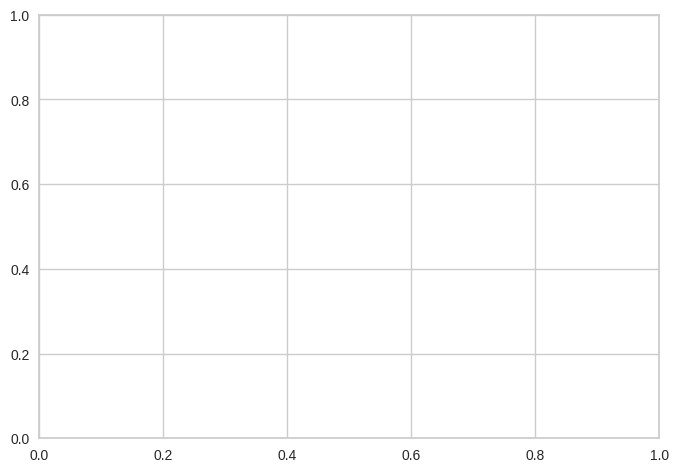

In [ ]:
evaluate_model(best)

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [ ]:
# # predict on test set
# holdout_pred = predict_model(best)

In [ ]:
# # show predictions df
# holdout_pred.head()

___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# # save pipeline
# save_model(best, 'my_first_pipeline')

In [ ]:
# # load pipeline
# loaded_best_pipeline = load_model('my_first_pipeline')
# loaded_best_pipeline

# 👇 Create Reqired Tree Function



## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [ ]:
# final_best = finalize_model(best)

In [ ]:
# final_best

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# best = compare_models()

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [ ]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [ ]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])#, 'catboost'

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.1498,2.0547,1.4301,0.6541,0.0480,0.0405,0.0870
catboost,CatBoost Regressor,1.1568,2.0959,1.4444,0.6475,0.0485,0.0408,0.4020
lightgbm,Light Gradient Boosting Machine,1.1742,2.1119,1.4507,0.6450,0.0488,0.0414,0.5660
rf,Random Forest Regressor,1.1805,2.2029,1.4805,0.6300,0.0498,0.0416,0.1730
et,Extra Trees Regressor,1.1853,2.2251,1.4885,0.6260,0.0501,0.0418,0.1370
dt,Decision Tree Regressor,1.1852,2.2257,1.4887,0.6259,0.0501,0.0418,0.0260
xgboost,Extreme Gradient Boosting,1.1876,2.2307,1.4902,0.6252,0.0501,0.0419,0.0510


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
# compare_tree_models

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
# compare_tree_models_results = pull()
# compare_tree_models_results

By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [ ]:
# best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
# help(compare_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

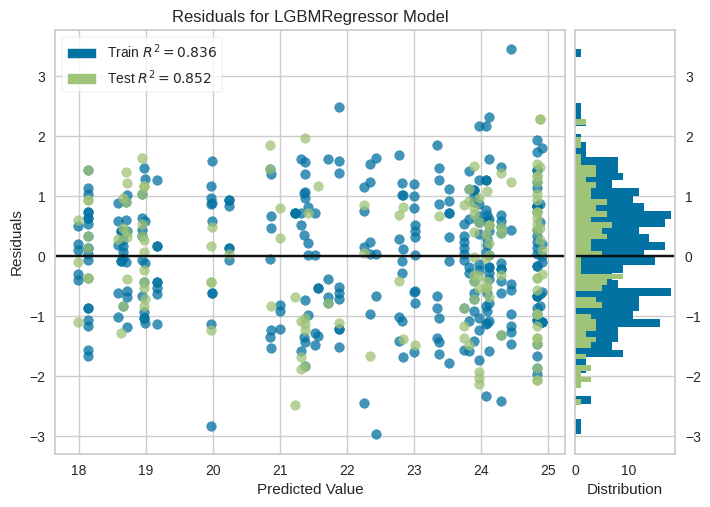

In [ ]:
# plot residuals
# plot_model(best, plot = 'residuals') #---------------------
plot_model(compare_tree_models, plot = 'residuals', scale =1.0) #---------------------

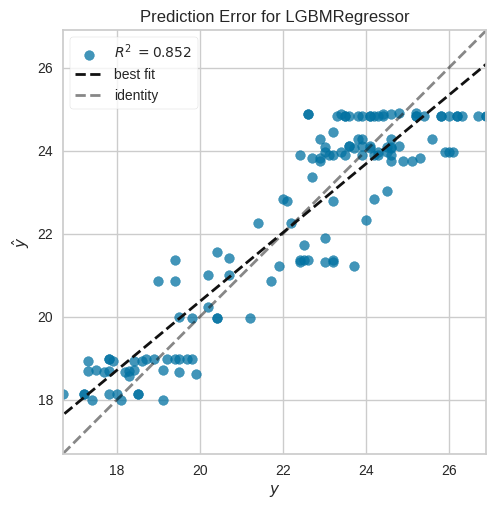

In [ ]:
# to control the scale of plot
plot_model(compare_tree_models, plot = 'error', scale = 1) #--------------------------

In [ ]:
# to save the plot
plot_model(compare_tree_models, plot = 'error', save=True) #--------------------------
plot_model(compare_tree_models, plot = 'residuals', save=True) #--------------------------

'Residuals.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model) #--------------------------

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [ ]:
# # check all the available models
# models()

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
# train model with default fold=10
# dt = create_model('dt')
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6949,0.7848,0.8859,0.8940,0.2732,0.4733
1,0.5367,0.4825,0.6946,0.9526,0.2189,0.2727
2,0.4432,0.3118,0.5584,0.9567,0.1887,0.2717
3,0.5390,0.4563,0.6755,0.9433,0.2337,0.3885
4,0.5493,0.5627,0.7501,0.9216,0.2524,0.6677
5,0.6431,0.5698,0.7548,0.9338,0.2467,0.6668
6,0.5409,0.4216,0.6493,0.9316,0.2456,0.4891
7,0.5545,0.4677,0.6839,0.9464,0.2547,0.5922
8,0.5925,0.6380,0.7988,0.8689,0.3177,0.5936


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# dt_results = pull()
# print(type(dt_results))
# dt_results

In [ ]:
# # train linear regression with fold=3
# lr = create_model('lr', fold=3)

In [ ]:
# # train lr and return train score as well alongwith CV
# create_model('dt', return_train_score=True)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [ ]:
# print(compare_tree_models.feature_names_in_)
# print(dt.feature_names_in_)
print(lr.feature_names_in_)

NameError: name 'rf' is not defined

In [ ]:
feature_names_in_ = ['SatelliteAverageMinTemperature']

# Add "v_" to the feature names
feature_names_v_ = [f'v_{name}' for name in feature_names_in_]

# Create an array of input variables using list comprehension
input_variables = [f'input[{i}] = {feature_names_v_[i]}' for i in range(len(feature_names_v_))]

# Print the array of input variables
for input_var in input_variables:
    print(input_var)

input[0] = v_SatelliteAverageMinTemperature


In [ ]:
# transpiles learned function to java
# print(convert_model(dt, language = 'java'))
print(convert_model(lr, language = 'java'))

public class Model {
    public static double score(double[] input) {
        return -17.681283950805664 + input[0] * 1.0511893033981323;
    }
}



## ✅ AnyLogic Code

//indexUnknown == Corresponding Column of the unknown variable
//f_EstimateUnknowns(dataColumnNumber,v_Temperature,v_Rainfall) Model	MAE	MSE	RMSE	R2	RMSLE	MAPE	TT (Sec)
double unknown = -9999;

switch (dataColumnNumber) {
// Temperature ------------------------------------------------------------------------------------------------
	case 3: // v_SatelliteAverageMinTemperature
		unknown = v_SatelliteAverageMinTemperature;
        break;
	case 4: // v_SatelliteAverageMinTemperatureStandardizedAnomaly
        unknown = -16.660005569458008 + v_SatelliteAverageMinTemperature * 1.000000238418579;// Linear Regression	0.0000	0.0000	0.0000	1.0000	0.0000	0.0000	0.0260
        break;
	case 5: // v_SatelliteAverageMaxTemperature
		unknown = 15.477807998657227 + v_SatelliteAverageMinTemperature * 0.7452782392501831; // Gradient Boosting Regressor	1.1498	2.0547	1.4301	0.6541	0.0480	0.0405	0.0830
        break;																				  // Linear Regression	1.2295	2.1735	1.4717	0.6339	0.0499	0.0435	0.0240
	case 6: // v_AverageMeanTemperature
        unknown = 7.252778053283691 + v_SatelliteAverageMinTemperature * 0.8848339915275574; // Linear Regression	0.9463	1.2504	1.1135	0.7866	0.0481	0.0429	0.0260
        break;
	case 7: // v_AverageMeanTemperatureAnomaly
        unknown =-14.853479385375977 + v_SatelliteAverageMinTemperature * 0.882835328578949; // Linear Regression	0.9451	1.2430	1.1103	0.7866	0.3784	1.0413	0.0390
        break;
	case 8: // v_AverageMeanTemperatureStandardizedAnomaly
	    unknown =-5.732344150543213 + v_SatelliteAverageMinTemperature * 0.34064602851867676; // Linear Regression	0.3643	0.1852	0.4286	0.7865	0.2245	1.6227	0.0260
	    break;
	case 9: // v_ChancoMeanTemperature
		unknown = 8.553702354431152 + v_SatelliteAverageMinTemperature * 0.7927377223968506;// Linear Regression	0.7822	1.0183	0.9941	0.7854	0.0444	0.0365	0.0260
	    break;
	case 10: // v_ChingaleMeanTemperature
		unknown = 6.655677795410156 + v_SatelliteAverageMinTemperature * 0.9769081473350525;//Linear Regression	1.3346	2.4799	1.5626	0.6964	0.0650	0.0583	0.0260
	    break;
	case 11: // v_MakokaMeanTemperature
		unknown = 7.098308563232422 + v_SatelliteAverageMinTemperature * 0.8401627540588379; //Linear Regression	0.8273	0.9692	0.9779	0.8135	0.0444	0.0395	0.0330
	    break;
	case 12: // v_NaminjiwaMeanTemperature
		unknown = 5.573662757873535 + v_SatelliteAverageMinTemperature * 0.912589967250824;	//Linear Regression	1.2697	2.2505	1.4940	0.6844	0.0684	0.0611	0.0450
	    break;
	case 13: // v_NtajaMeanTemperature
		unknown = 9.26572322845459 + v_SatelliteAverageMinTemperature * 0.8460623621940613;	//Linear Regression	0.8156	1.0117	1.0001	0.8112	0.0406	0.0346	0.7060
	    break;
	case 14: // v_ZombaRTCMeanTemperature
		unknown = 6.621180534362793 + v_SatelliteAverageMinTemperature * 0.9271628856658936;	//Linear Regression	1.3646	2.5770	1.5971	0.6639	0.0689	0.0618	0.0250
	    break;
	case 15: // v_AverageMinTemperature
		unknown = -1.2127094268798828 + v_SatelliteAverageMinTemperature * 1.0496625900268555;	//	Linear Regression	0.5679	0.5180	0.7151	0.9283	0.0428	0.0360	0.0260
	    break;
	case 16: // v_AverageMinTemperatureAnomaly
		unknown = -17.681283950805664 + v_SatelliteAverageMinTemperature * 1.0511893033981323;	//	Linear Regression	0.5662	0.5150	0.7126	0.9289	0.2452	0.4735	0.0250
	    break;
	case 17: // v_AverageMinTemperatureStandardizedAnomaly
		unknown = -6.155369758605957 + v_SatelliteAverageMinTemperature * 0.3659158945083618;	//Linear Regression	0.1971	0.0624	0.2481	0.9289	0.1407	0.4847	0.0360
	    break;
	case 18: // v_ChancoMinTemperature
		unknown = 0.4606494903564453 + v_SatelliteAverageMinTemperature * 0.9653146266937256;	//Linear Regression	0.7564	1.1201	1.0150	0.8435	0.0611	0.0483	0.0330
	    break;
	case 19: // v_ChingaleMinTemperature
		unknown = -3.422130584716797 + v_SatelliteAverageMinTemperature * 1.16911780834198;	//Linear Regression	1.0009	1.5246	1.2251	0.8449	0.0763	0.0659	0.0240
	    break;
	case 20: // v_MakokaMinTemperature
		unknown = -1.1868085861206055 + v_SatelliteAverageMinTemperature * 1.0146383047103882;	// Huber Regressor	0.5484	0.5293	0.7204	0.9234	0.0442	0.0359	0.0290
	    break;	// Linear Regression	0.5479	0.5309	0.7216	0.9231	0.0442	0.0359	0.0270
	case 21: // v_NaminjiwaMinTemperature
		unknown = -3.012798309326172 + v_SatelliteAverageMinTemperature * 1.0946149826049805;	// Linear Regression	0.7338	0.8702	0.9256	0.8933	0.0602	0.0506	0.0240
	    break;
	case 22: // v_NtajaMinTemperature
		unknown = 2.1548709869384766 + v_SatelliteAverageMinTemperature * 0.9586561918258667;	//	Linear Regression	0.7320	0.9047	0.9336	0.8674	0.0501	0.0411	0.0280
	    break;
	case 23: // v_ZombaRTCMinTemperature
		unknown = -2.3549880981445312 + v_SatelliteAverageMinTemperature * 1.1015723943710327;	// Linear Regression	0.8858	1.1932	1.0840	0.8610	0.0662	0.0574	0.0240
	    break;
	case 24: // v_AverageMaxTemperature
		unknown = 15.762325286865234 + v_SatelliteAverageMinTemperature * 0.7171567678451538;	//AdaBoost Regressor	1.4709	3.2018	1.7789	0.4763	0.0611	0.0526	0.0440
	    break;	// Linear Regression	1.5180	3.2397	1.7958	0.4694	0.0618	0.0544
	case 25: // v_AverageMaxTemperatureAnomaly
		unknown = -12.086764335632324 + v_SatelliteAverageMinTemperature * 0.7179895043373108;	//AdaBoost Regressor	1.4688	3.1464	1.7630	0.4871	0.5579	1.4029	0.0420
	    break;	//Linear Regression	1.5234	3.2531	1.7998	0.4684	0.5132	1.5572	0.0260
	case 26: // v_AverageMaxTemperatureStandardizedAnomaly
		unknown = -4.61706018447876 + v_SatelliteAverageMinTemperature * 0.2742142379283905;	//AdaBoost Regressor	0.5658	0.4681	0.6799	0.4780	0.3327	1.8146	0.0410
	    break;	   //Linear Regression	0.5821	0.4754	0.6879	0.4679	0.3115	1.9707	0.0270
	case 27: // v_ChancoMaxTemperature
		unknown = 16.64138412475586 + v_SatelliteAverageMinTemperature * 0.6204992532730103;	//Bayesian Ridge	1.2046	2.2994	1.4903	0.4926	0.0533	0.0446	0.0350
	    break;	//Linear Regression	1.2048	2.2992	1.4901	0.4925	0.0532	0.0446	0.0240
	case 28: // v_ChingaleMaxTemperature
		unknown = 16.723831176757812 + v_SatelliteAverageMinTemperature * 0.7851614952087402;	//AdaBoost Regressor	1.8561	5.2326	2.2640	0.4108	0.0730	0.0623	0.0410
	    break;	//Linear Regression	1.9303	5.3042	2.2876	0.3950	0.0740	0.0650	0.0260
	case 29: // v_MakokaMaxTemperature
		unknown = 15.162158012390137 + v_SatelliteAverageMinTemperature * 0.6760290861129761;	//Linear Regression	1.3048	2.6363	1.5998	0.5130	0.0586	0.0495	0.6530
	    break;
	case 30: // v_NaminjiwaMaxTemperature
		unknown = 14.156989097595215 + v_SatelliteAverageMinTemperature * 0.7304900288581848;	//AdaBoost Regressor	2.1156	6.3170	2.5001	0.3126	0.0904	0.0804	0.0420
	    break;	 // Linear Regression	2.1317	6.3808	2.5217	0.3034	0.0912	0.0807	0.0440
	case 31: // v_NtajaMaxTemperature
		unknown = 16.34516143798828 + v_SatelliteAverageMinTemperature * 0.735171914100647;	//Ridge Regression	1.2600	2.4330	1.5471	0.5657	0.0510	0.0434	0.0270
	    break;	//Linear Regression	1.2600	2.4330	1.5471	0.5656	0.0510	0.0434	0.0280
	case 32: // v_ZombaRTCMaxTemperature
		unknown =  15.596969604492188 + v_SatelliteAverageMinTemperature * 0.7531309723854065;	//Ridge Regression	2.0704	6.0862	2.4562	0.3406	0.0840	0.0738	0.0270
	    break;	//Linear Regression	2.0704	6.0862	2.4561	0.3405	0.0840	0.0738	0.0250

// Rainfall ------------------------------------------------------------------------------------------------
	case 33: // v_SatelliteAverageRainfall
		unknown = v_SatelliteAverageRainfall
	    break;
	case 34: // v_SatelliteAverageRainfallStandardizedAnomaly
		unknown = -0.819153368473053 + v_SatelliteAverageRainfall * 0.030590662732720375;//Linear Regression	0.0021	0.0000	0.0026	1.0000	0.0017	0.0086	0.0250
	    break;
	case 35: // v_AverageRainfall
		unknown = 9.69647216796875 + v_SatelliteAverageRainfall * 3.0520846843719482;// Linear Regression	41.5367	4474.3251	65.8478	0.6014	1.1444	3.3615	0.0270
	    break;
	case 36: // v_RainfallAnomaly
		unknown = -75.5726089477539 + v_SatelliteAverageRainfall * 3.0521161556243896; // Elastic Net	41.5588	4474.2224	65.8470	0.6015	0.8504	0.9567	0.0270
	    break; // Linear Regression	41.5366	4474.2158	65.8465	0.6014	0.8502	0.9569
	case 37: // v_StandardizedRainfallAnomaly
		unknown = -0.684950053691864 + v_SatelliteAverageRainfall * 0.027668694034218788;// Elastic Net	0.3822	0.3682	0.5974	0.6017	0.2644	0.9359	0.0330
	    break;//Linear Regression	0.3765	0.3678	0.5970	0.6014	0.2630	0.9423	0.0280
	case 38: // v_ChancoRainfall
		unknown = 14.321258544921875 + v_SatelliteAverageRainfall * 3.5829250812530518;// Light Gradient Boosting Machine	51.2972	7427.8697	85.0221	0.5527	1.5225	2.1634	0.1600
	    break; //Linear Regression	53.4692	7656.4516	85.8134	0.5472	1.6332	2.6268	0.0390
	case 39: // v_ChingaleRainfall
		unknown =  9.436100006103516 + v_SatelliteAverageRainfall * 2.652162790298462;// Light Gradient Boosting Machine	50.6620	7027.8453	81.6379	0.4309	1.7973	2.0490	0.2210
	    break;//Linear Regression	52.2294	6956.8180	82.3717	0.4164	1.9890	2.7959	0.7200
	case 40: // v_MakokaRainfall
		unknown = 11.77880859375 + v_SatelliteAverageRainfall * 2.7480640411376953;// Light Gradient Boosting Machine	49.0761	6234.5096	76.7258	0.4782	1.5889	5.4445	0.1470
	    break;//Linear Regression	49.8643	6266.7670	77.6934	0.4735	1.7127	7.3675	0.0240
	case 41: // v_NaminjiwaRainfall
		unknown = 13.842552185058594 + v_SatelliteAverageRainfall * 2.9617063999176025;// huber	Huber Regressor	46.0382	5619.8078	74.3043	0.4808	1.4835	2.1185	0.0290
	    break;//Linear Regression	46.9409	5629.8148	74.4171	0.4772	1.5854	2.7658	0.0440
	case 42: // v_NtajaRainfall
		unknown = 10.815776824951172 + v_SatelliteAverageRainfall * 2.288658857345581;// 	Bayesian Ridge	47.3861	5875.4115	75.3560	0.3883	2.0801	4.1560	0.0250
	    break;//Linear Regression	47.2747	5874.9284	75.3477	0.3882	2.0721	4.1200	0.6540
	case 43: // v_ZombaRTCRainfall
		unknown = 11.313201904296875 + v_SatelliteAverageRainfall * 3.626018524169922;// Lasso Regression	54.2129	7580.5141	85.9738	0.5503	1.7434	4.0676	0.0280
	    break;//Linear Regression	54.2038	7580.4832	85.9736	0.5502	1.7425	4.0631	0.0270
	case 44: // v_ChancellorCollegeRainfall
		unknown = 5.845367431640625 + v_SatelliteAverageRainfall * 3.830941915512085;// Huber Regressor	49.8873	7478.2579	83.7398	0.6083	1.1736	1.8384	0.0520
	    break;//Linear Regression	51.6058	7476.3668	83.7073	0.6026	1.3684	2.3360	0.0270
	case 45: // v_ChimpeniRainfall
		unknown = 6.874382019042969 + v_SatelliteAverageRainfall * 3.020272731781006;// AdaBoost Regressor	34.7384	3776.7271	60.6267	0.7389	0.9617	0.5747	0.0500
	    break;//Linear Regression	38.8763	4302.1255	63.9293	0.7138	1.2473	1.2067	0.0250
	case 46: // v_ReturnPeriod
		unknown = f_Estimatev_ReturnPeriod(v_SatelliteAverageRainfall);// Decision Tree Regressor	0.0469	1.4062	0.3750	0.9637	0.0111	0.0200	0.0260
	    break;
	case 47: // v_ActualEvapotransp
		unknown = f_Estimatev_ActualEvapotransp(v_SatelliteAverageMinTemperature,v_SatelliteAverageRainfall);// Gradient Boosting Regressor	16.1733	477.2102	21.7550	0.5357	0.4130	0.3751	0.1510
	    break;// Light Gradient Boosting Machine	16.3756	500.5886	22.2614	0.5145	0.4232	0.3866	0.0880
	case 49: // v_SoilMoisture
		unknown = 96.67308807373047 + v_SatelliteAverageMinTemperature * 0.0 + v_SatelliteAverageRainfall * 0.7959938645362854;// AdaBoost Regressor	51.8088	3612.1740	59.9124	0.1707	0.6217	0.7255	0.0440
	    break;//Orthogonal Matching Pursuit	53.6374	3839.2948	61.7846	0.1174	0.6435	0.7733	0.0270
	case 50: // v_SPI1
		unknown = f_Estimatev_SPI1(v_SatelliteAverageMinTemperature,v_SatelliteAverageRainfall); // gbr	Gradient Boosting Regressor	0.4651	0.3903	0.6229	0.4462	0.2929	1.4219	0.0910
	    break;//ightgbm	Light Gradient Boosting Machine	0.4758	0.4134	0.6407	0.4125	0.3020	1.5640	0.1620
	case 51: // v_SPI3
		unknown = //
	    break;
	case 52: // v_SPI6
		unknown = //
	    break;
	case 53: // v_SPI12
		unknown = //
	    break;
	case 54: // v_SPI24
		unknown = //
	    break;
	case 55: // v_SPI36
		unknown = //
	    break;
	case 56: // v_SPI48
		unknown = //
	    break;
	case 57: // v_SPI60
		unknown = //
	    break;
	case 58: // v_SPI72
		unknown = //
	    break;
	case 59: // v_PalmerDroughtSeverityIndex
		unknown = //
	    break;
	case 60: // v_Waterloggingkm2
		unknown = //
	    break;
	case 61: // v_LakeSurfaceAreakm2
		unknown = //
	    break;
	case 62: // v_LakeDepthm
	case 63: // v_NDVIAreakm2
	case 64: // v_CholeraCasesD1
	case 65: // v_CholeraCasesD2
	case 66: // v_CholeraCasesD3
	case 67: // v_CholeraCasesD4
	case 68: // v_CholeraCasesTotal
	case 69: // v_SchistosomiasisCasesD1
	case 70: // v_SchistosomiasisCasesD2
	case 71: // v_SchistosomiasisCasesD3
	case 72: // v_SchistosomiasisCasesD4
	case 73: // v_SchistosomiasisCasesTotal
	case 74: // v_MalariaCasesD1
	case 75: // v_MalariaCasesD2
	case 76: // v_MalariaCasesD3
	case 77: // v_MalariaCasesD4
	case 78: // v_MalariaCasesTotal
	case 79: // v_MosquitoNetsD1
	case 80: // v_MosquitoNetsD2
	case 81: // v_MosquitoNetsD3
	case 82: // v_MosquitoNetsD4
	case 83: // v_MosquitoNetsTotal
	case 86: // v_Malnutrition_LT5_NewCases_AllDistricts
	case 99: // v_PopulationChilwaBasinMalawi
	case 103: // v_TotalFishCatch
	case 104: // v_MaizeArea_HA_D1
	case 105: // v_MaizeProduction_MT_D1
	case 106: // v_RiceArea_HA_D1
	case 107: // v_RiceProduction_MT_D1
	case 108: // v_TobaccoArea_HA_D1
	case 109: // v_TobaccoProduction_MT_D1
	case 110: // v_UREA_T_D1
	case 111: // v_MaizeArea_HA_D2
	case 112: // v_MaizeProduction_MT_D2
	case 113: // v_RiceArea_HA_D2
	case 114: // v_RiceProduction_MT_D2
	case 115: // v_TobaccoArea_HA_D2
	case 116: // v_TobaccoProduction_MT_D2
	case 117: // v_UREA_T_D2
	case 118: // v_MaizeArea_HA_D4
	case 119: // v_MaizeProduction_MT_D4
	case 120: // v_RiceArea_HA_D4
	case 121: // v_RiceProduction_MT_D4
	case 122: // v_TobaccoArea_HA_D4
	case 123: // v_TobaccoProduction_MT_D4
	case 124: // v_UREA_T_D4
	case 125: // v_MaizeAreaTotal_HA
	case 126: // v_MaizeProductionTotal_MT
	case 127: // v_RiceAreaTotal_HA
	case 128: // v_RiceProductionTotal_MT
	case 129: // v_TobaccoAreaTotal_HA
	case 130: // v_TobaccoProductionTotal_MT
	case 131: // v_UREATotal_T

        unknown = dataColumnNumber;
        break;
    default:
        // Handle default case if needed
        break;
}

return unknown;
/*
3,v_SatelliteAverageMinTemperature

4,v_SatelliteAverageMinTemperatureStandardizedAnomaly

5,v_SatelliteAverageMaxTemperature

6,v_AverageMeanTemperature

7,v_AverageMeanTemperatureAnomaly

8,v_AverageMeanTemperatureStandardizedAnomaly

9,v_ChancoMeanTemperature

10,v_ChingaleMeanTemperature

11,v_MakokaMeanTemperature

12,v_NaminjiwaMeanTemperature

13,v_NtajaMeanTemperature

14,v_ZombaRTCMeanTemperature

15,v_AverageMinTemperature

16,v_AverageMinTemperatureAnomaly

17,v_AverageMinTemperatureStandardizedAnomaly

18,v_ChancoMinTemperature

19,v_ChingaleMinTemperature

20,v_MakokaMinTemperature

21,v_NaminjiwaMinTemperature

22,v_NtajaMinTemperature

23,v_ZombaRTCMinTemperature

24,v_AverageMaxTemperature

25,v_AverageMaxTemperatureAnomaly

26,v_AverageMaxTemperatureStandardizedAnomaly

27,v_ChancoMaxTemperature

28,v_ChingaleMaxTemperature

29,v_MakokaMaxTemperature

30,v_NaminjiwaMaxTemperature

31,v_NtajaMaxTemperature

32,v_ZombaRTCMaxTemperature

33,v_SatelliteAverageRainfall

34,v_SatelliteAverageRainfallStandardizedAnomaly

35,v_AverageRainfall

36,v_RainfallAnomaly

37,v_StandardizedRainfallAnomaly

38,v_ChancoRainfall

39,v_ChingaleRainfall

40,v_MakokaRainfall

41,v_NaminjiwaRainfall

42,v_NtajaRainfall

43,v_ZombaRTCRainfall

44,v_ChancellorCollegeRainfall

45,v_ChimpeniRainfall

46,v_ReturnPeriod

47,v_ActualEvapotransp

49,v_SoilMoisture

50,v_SPI1

51,v_SPI3

52,v_SPI6

53,v_SPI12

54,v_SPI24

55,v_SPI36

56,v_SPI48

57,v_SPI60

58,v_SPI72

59,v_PalmerDroughtSeverityIndex

60,v_Waterloggingkm2

61,v_LakeSurfaceAreakm2

62,v_LakeDepthm

63,v_NDVIAreakm2

64,v_CholeraCasesD1

65,v_CholeraCasesD2

66,v_CholeraCasesD3

67,v_CholeraCasesD4

68,v_CholeraCasesTotal

69,v_SchistosomiasisCasesD1

70,v_SchistosomiasisCasesD2

71,v_SchistosomiasisCasesD3

72,v_SchistosomiasisCasesD4

73,v_SchistosomiasisCasesTotal

74,v_MalariaCasesD1

75,v_MalariaCasesD2

76,v_MalariaCasesD3

77,v_MalariaCasesD4

78,v_MalariaCasesTotal

79,v_MosquitoNetsD1

80,v_MosquitoNetsD2

81,v_MosquitoNetsD3

82,v_MosquitoNetsD4

83,v_MosquitoNetsTotal

86,v_Malnutrition_LT5_NewCases_AllDistricts

99,v_PopulationChilwaBasinMalawi

103,v_TotalFishCatch

104,v_MaizeArea_HA_D1

105,v_MaizeProduction_MT_D1

106,v_RiceArea_HA_D1

107,v_RiceProduction_MT_D1

108,v_TobaccoArea_HA_D1

109,v_TobaccoProduction_MT_D1

110,v_UREA_T_D1

111,v_MaizeArea_HA_D2

112,v_MaizeProduction_MT_D2

113,v_RiceArea_HA_D2

114,v_RiceProduction_MT_D2

115,v_TobaccoArea_HA_D2

116,v_TobaccoProduction_MT_D2

117,v_UREA_T_D2

118,v_MaizeArea_HA_D4

119,v_MaizeProduction_MT_D4

120,v_RiceArea_HA_D4

121,v_RiceProduction_MT_D4

122,v_TobaccoArea_HA_D4

123,v_TobaccoProduction_MT_D4

124,v_UREA_T_D4

125,v_MaizeAreaTotal_HA

126,v_MaizeProductionTotal_MT

127,v_RiceAreaTotal_HA

128,v_RiceProductionTotal_MT

129,v_TobaccoAreaTotal_HA

130,v_TobaccoProductionTotal_MT

131,v_UREATotal_T
*/

In [ ]:
# # Visualize the decision tree using plot_tree
# plt.figure(figsize=(12, 6))
# plot_model(dt, 'tree')
# plt.savefig('decision_tree_Cholera_high_res.jpg', dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:
# import graphviz
# from sklearn.tree import export_graphviz

# feature_names = dt.feature_names_in_

# # Export the decision tree to DOT format
# dot_data = export_graphviz(dt, out_file=None, feature_names=feature_names, filled=True, rounded=True, special_characters=True)

# # Visualize the decision tree
# graph = graphviz.Source(dot_data)
# graph.view()  # This line will display the decision tree graph
# graph.render("decision_tree_Cholera", format="png", cleanup=True)

___